# Load libraries

In [4]:
import sys
sys.path.append('../../utils/')

from DarioFunctions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

scaler = StandardScaler()
nIter = 50
nProcesses = 10

opsins = ['opn1lw1', 'opn1lw2', 'opn1mw1', 'opn1mw2','opn1mw3','opn1mw4','opn1sw1','opn1sw2', 'rhol', # zebrafish
          'OPN1SW', 'OPN2SW', 'OPN1MSW', 'OPN1LW', 'RHO', # chicken
          'LOC132767847', 'LOC132773706','LOC132767849', 'OPN1SW', 'RHO', # lizard 
          'ENSSTOG00000024701', 'OPN1SW', 'RHO' # squirrel
          'OPN1LW', 'OPN1SW', 'RHO'] # human


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Output files directory

os.mkdir('MappingTables')
os.mkdir('MappingTables/five_species')
os.mkdir('MappingTables/five_species_no_rods')
os.mkdir('MappingTables/zechli')
os.mkdir('MappingTables/swap')
os.mkdir('MappingTables/swap_no_opsins')
os.mkdir('MappingTables/swap_animaltfdb')

# Load pre-computed homology graph

In [5]:
sm_ref = samap.utils.load_samap("../../../storage/samap/pkl/sm_pmNCBI_zeENS_chNCBI_liNCBI_opNCBI_sqENS_hsENS.samap")
gnnm = (sm_ref.gnnm, sm_ref.gns, sm_ref.gns_dict)

# Five species

In [4]:
path = '../../Species_Objects/Cone_Objects/updated/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
zechlisqhs_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
zechlisqhs_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))

zechlisqhs_single

{'ze': '../../Species_Objects/Cone_Objects/updated/ZebrafishAdult_single.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/updated/Chicken_single.h5ad',
 'li': '../../Species_Objects/Cone_Objects/updated/Lizard_single.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/updated/Squirrel_single.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/updated/Human_single.h5ad'}

## Whole transcriptome without DCs

In [4]:
from multiprocessing import Pool

def wrapper(seed, downsample):
    return SAMapTrial(zechlisqhs_single, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.9355026297705117
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.936360871512124
Iteration: 1, Convergence: 0.9363821222877017
Iteration: 1, Convergence: 0.9370027139276473
Iteration: 1, Convergence: 0.9364806246086416
Iteration: 2, Convergence: 0.020066394099364726
Iteration: 2, Convergence: 0.017447487972667087
Iteration: 2, Convergence: 0.017393444815471403
Iteration: 2, Convergence: 0.018216450573094855
Elapsed time: 4.550666332244873 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.018863863837458514
Elapsed time: 5.752683401107788 seconds
Elapsed time: 4.259237289428711 seconds
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Iteration: 1, Convergence: 0.8906712328941204
Elapsed time: 5.978524684906006 seconds
Elapsed time: 5.8985514640808105 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence:

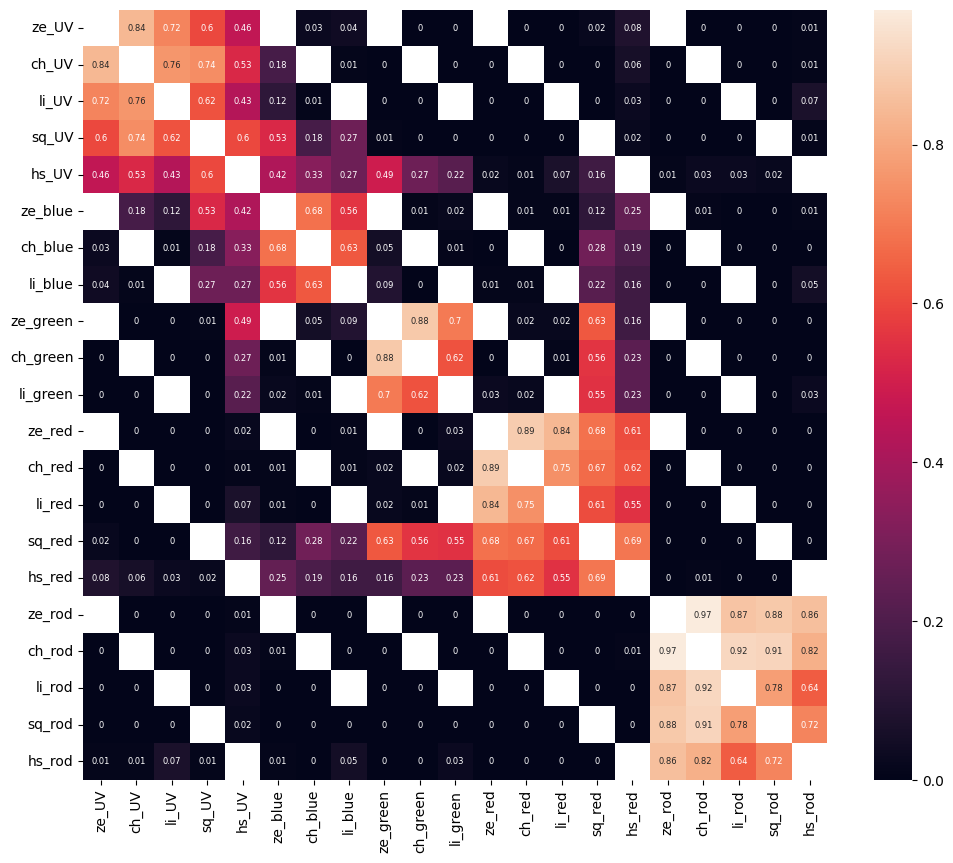

In [5]:
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species/zechlisqhs_single_opsins')

## Whole transcriptome without DCs (no opsins)

In [5]:
from multiprocessing import Pool

def wrapper(seed, downsample):
    return SAMapTrial(zechlisqhs_single, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0



/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9330614125710625
Iteration: 1, Convergence: 0.9323247188088516
Iteration: 1, Convergence: 0.932961385909256
Iteration: 1, Convergence: 0.9318740467728851
Iteration: 1, Convergence: 0.9328120054367004
Iteration: 2, Convergence: 0.020091039078938895
Iteration: 2, Convergence: 0.021152374083664653
Iteration: 2, Convergence: 0.018735956651002715
Iteration: 2, Convergence: 0.021861249713058275
Iteration: 2, Convergence: 0.01979439399241924
Elapsed time: 5.5667712688446045 seconds
Elapsed time: 5.645615100860596 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 6.552755355834961 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8850409598000947
Elapsed time: 7.005822658538818 seconds
RUNNING SAM
Iteration: 1, Convergence: 0.8846257812391475Iteration:

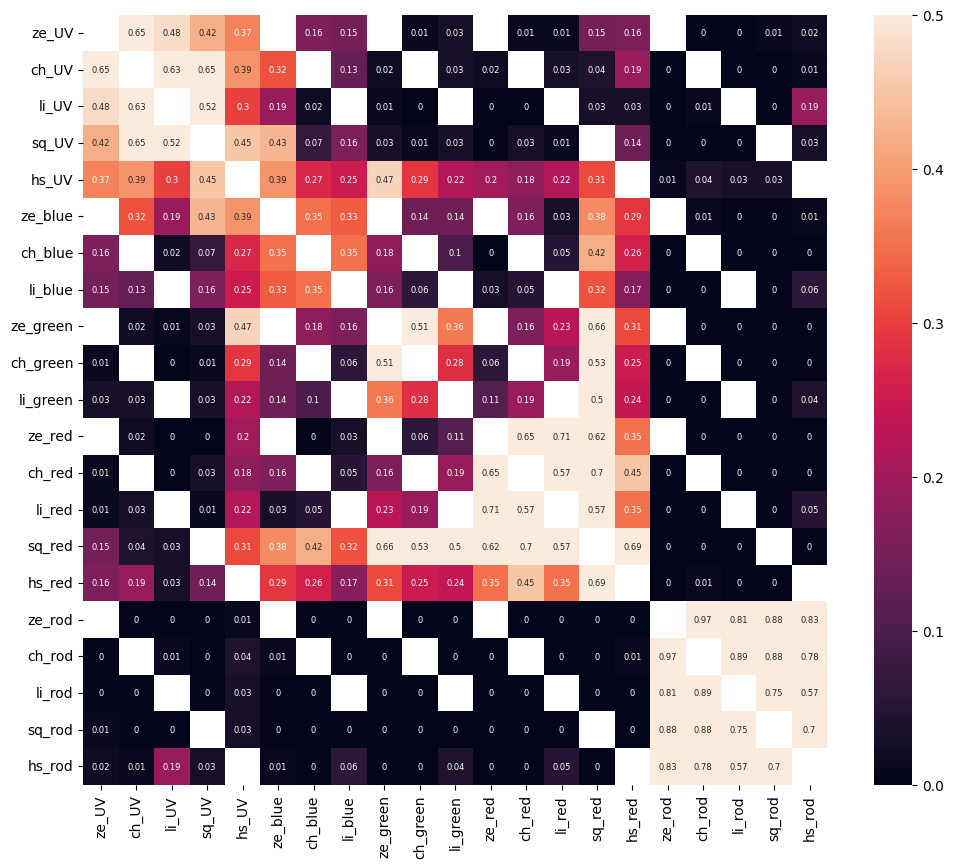

In [6]:
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species/zechlisqhs_single_no_opsins')

## Whole transcriptome with DCs

In [6]:
def wrapper(seed, downsample):
    return SAMapTrial(zechlisqhs_double, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))
        

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM
RUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

Iteration: 1, Convergence: 0.9355002011065987


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.936360871512124
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9364806246086416


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.02001853479831205
Iteration: 2, Convergence: 0.017393444815471403
Iteration: 2, Convergence: 0.018216450573094855
Iteration: 1, Convergence: 0.9370027139276473
Elapsed time: 3.317976951599121 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9363826152908599
Elapsed time: 3.6720774173736572 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.8953094482421875 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.018863863837458514
Iteration: 2, Convergence: 0.017445882654947932
Elapsed time: 13.591903686523438 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8901803831668889
Iteration: 1, Convergence: 0.8901029823127871
Iteration: 1, Convergence: 0.8905019392225165
Elapsed time: 26.889748096466064 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8898842252247829
Iteration: 2, Convergen

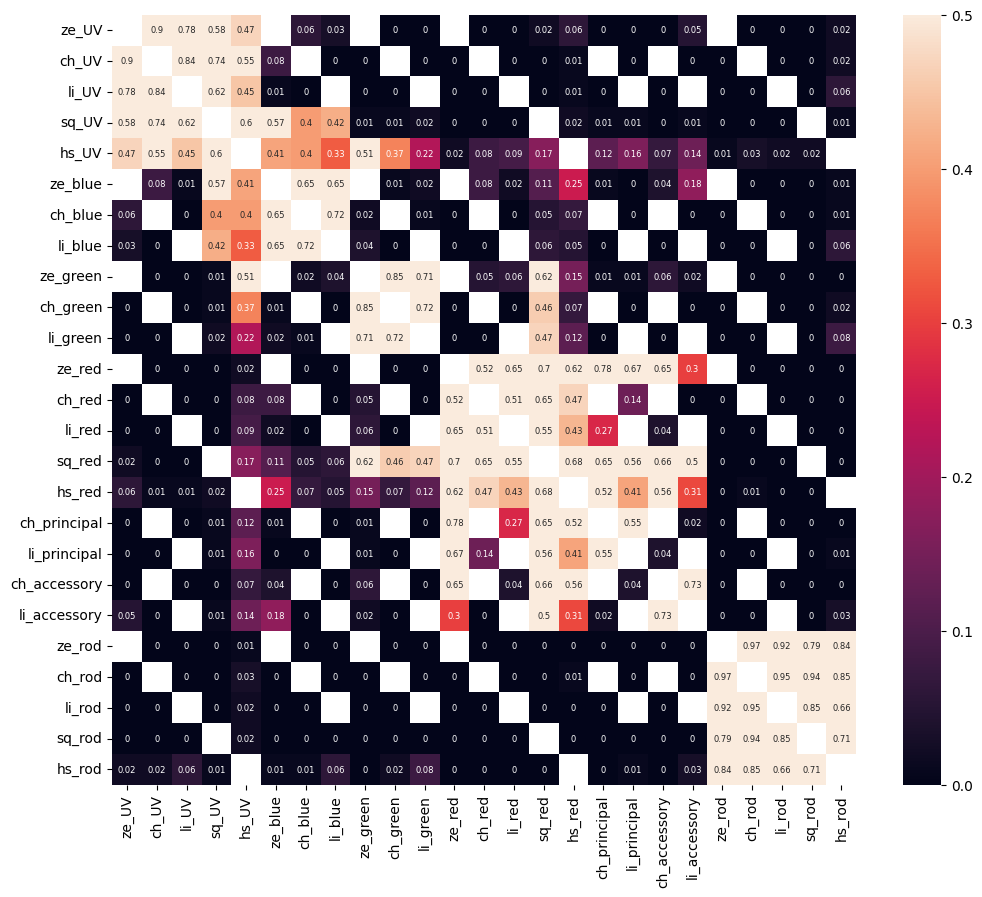

In [7]:
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species/zechlisqhs_double')

## TF AnimalTFDB without DCs

In [8]:
path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
controlfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/ZebrafishAdult_single.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Chicken_single.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Lizard_single.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Squirrel_single.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Human_single.h5ad'}

In [9]:
def wrapper(seed, downsample):
    return SAMapTrial(controlfiles, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAMRUNNING SAM

RUNNING SAMIteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0
RUNNING SAM

Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8836140963979687
Iteration: 1, Convergence: 0.8812878952674784
Iteration: 1, Convergence: 0.8840292147406612
Iteration: 1, Convergence: 0.8819928370806418
Iteration: 1, Convergence: 0.8821376135341101
Iteration: 2, Convergence: 0.024855409333219867
Iteration: 2, Convergence: 0.024096074880165245
Iteration: 2, Convergence: 0.025203518462911873
Iteration: 2, Convergence: 0.025206097388929406
Iteration: 2, Convergence: 0.0250665439430567
Elapsed time: 2.884462356567383 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.4813740253448486 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.61776065826416 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.7568259239196777 secondsElapsed time: 3.748574495315

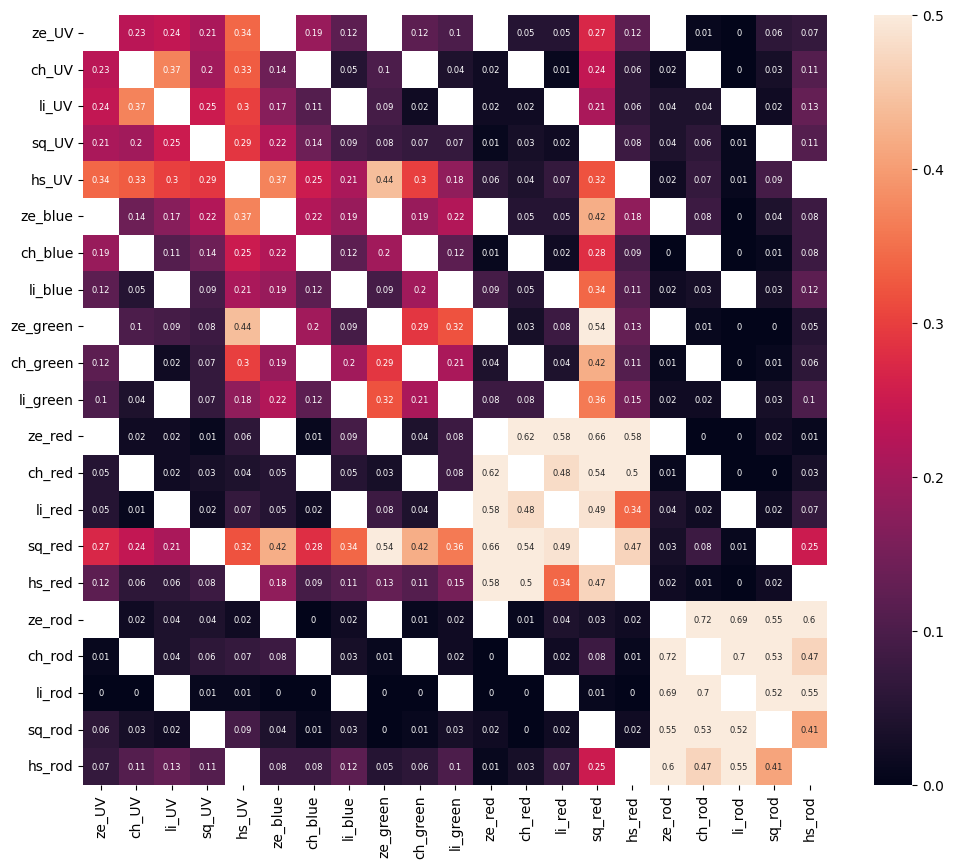

In [10]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species/animaldb_single')

## TF AnimalTFDB with DCs

In [11]:
path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
expfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Lizard_double.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Squirrel_double.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Human_double.h5ad'}

In [12]:
def wrapper(seed, downsample):
    return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8821376135341101
Iteration: 1, Convergence: 0.8819928370806418
Iteration: 1, Convergence: 0.8840292147406612
Iteration: 1, Convergence: 0.8836166352420276
Iteration: 1, Convergence: 0.8812878952674784
Iteration: 2, Convergence: 0.0250665439430567Iteration: 2, Convergence: 0.025206097388929406

Iteration: 2, Convergence: 0.024815631743779737
Iteration: 2, Convergence: 0.024096074880165245
Elapsed time: 3.3466134071350098 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.542340040206909 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.025203518462911873
Elapsed time: 3.720388174057007 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 4.574519395828247 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 13.3908374309

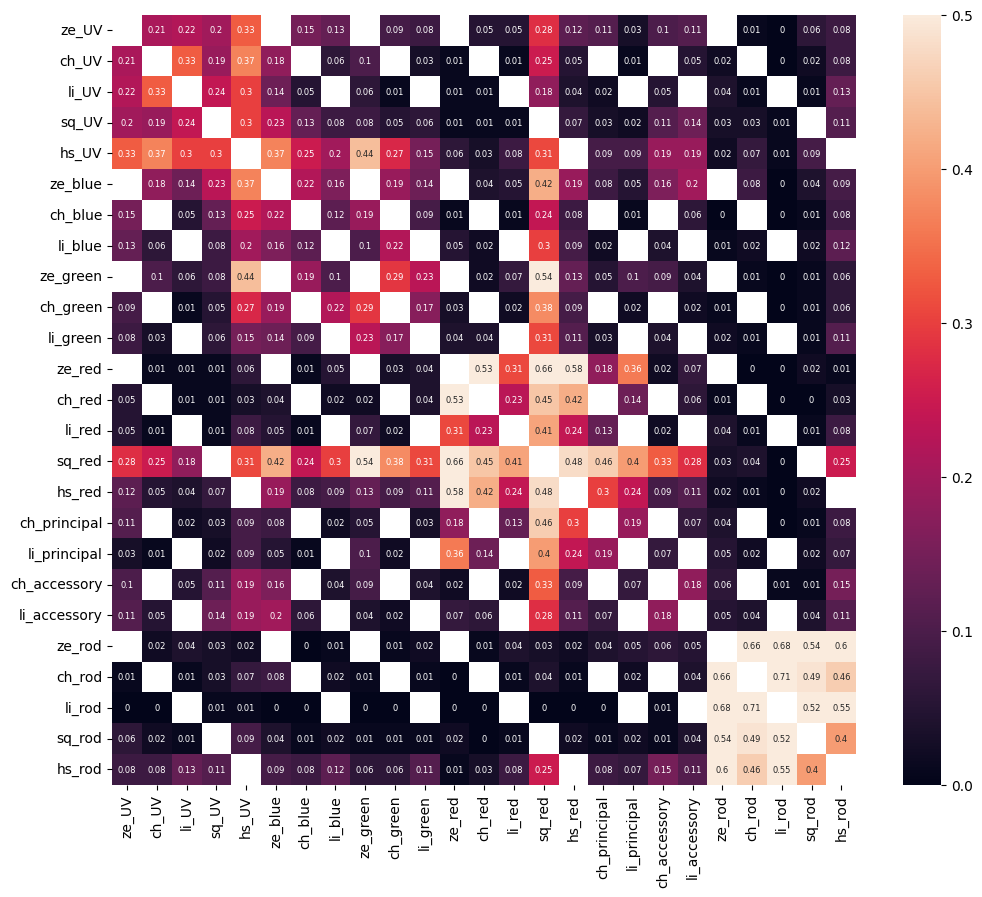

In [13]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species/animaldb_double')

## TF Liu et al. without DCs

In [6]:
path = '../../Species_Objects/Cone_Objects/only_tfs_corbo/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
controlfiles
nIter = 5

In [7]:
def wrapper(seed, downsample):
    return SAMapTrial(controlfiles, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM




Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0

Iteration: 1, Convergence: 0.713557399013485Iteration: 1, Convergence: 0.6974134840543295Iteration: 1, Convergence: 0.7212858665376588


Iteration: 1, Convergence: 0.7027328139165819Iteration: 1, Convergence: 0.711466997354141

Iteration: 2, Convergence: 0.03783760259832234
Iteration: 2, Convergence: 0.04383689937651982
Iteration: 2, Convergence: 0.042792662938892785
Iteration: 2, Convergence: 0.0407901493531879
Iteration: 2, Convergence: 0.0373499113985111
Iteration: 3, Convergence: 0.020250691443609175
Iteration: 3, Convergence: 0.01825563438889326
Iteration: 3, Convergence: 0.018379692342038987
Iteration: 3, Convergence: 0.016999650803115215
Iteration: 3, Convergence: 0.019503634355317264
Elapsed time: 2.316756248474121 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
E

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 6, Convergence: 0.0104848624847989
Iteration: 1, Convergence: 0.6587868683687801
Elapsed time: 1.3222761154174805 seconds


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.28993821144104 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.05035356471517441
Elapsed time: 1.4319047927856445 seconds


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


Iteration: 1, Convergence: 0.6123552003936713RUNNING SAM
Iteration: 0, Convergence: 1.0

Iteration: 1, Convergence: 0.633204537077519
Iteration: 1, Convergence: 0.6779658442986415Iteration: 2, Convergence: 0.051344756465384764

Iteration: 1, Convergence: 0.6529635176199265
Iteration: 3, Convergence: 0.013035968283976709
Iteration: 3, Convergence: 0.015216721641872691
Iteration: 2, Convergence: 0.04309925132797199
Iteration: 2, Convergence: 0.03442114847958493
Iteration: 2, Convergence: 0.053212223229974445
Elapsed time: 1.7172026634216309 seconds
Iteration: 3, Convergence: 0.013581371900762664
Elapsed time: 1.7034330368041992 secondsIteration: 3, Convergence: 0.020589853111790155

Elapsed time: 1.2636008262634277 seconds


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


RUNNING SAM
Iteration: 0, Convergence: 1.0
Not updating the manifold...
Not updating the manifold...
Elapsed time: 1.8317039012908936 seconds
Iteration: 4, Convergence: 0.01413196663067029
Iteration: 5, Convergence: 0.011584436744772292
Iteration: 1, Convergence: 0.6690439980880184
Not updating the manifold...
Not updating the manifold...
Iteration: 2, Convergence: 0.03851182492453589Not updating the manifold...

Not updating the manifold...
Iteration: 6, Convergence: 0.011375528721830142
Not updating the manifold...
Elapsed time: 2.0835983753204346 secondsIteration: 7, Convergence: 0.013650981425649711

Not updating the manifold...
94 `ze` gene symbols match between the datasets and the BLAST graph.
106 `ch` gene symbols match between the datasets and the BLAST graph.
99 `li` gene symbols match between the datasets and the BLAST graph.
86 `sq` gene symbols match between the datasets and the BLAST graph.
95 `hs` gene symbols match between the datasets and the BLAST graph.
Prepping data

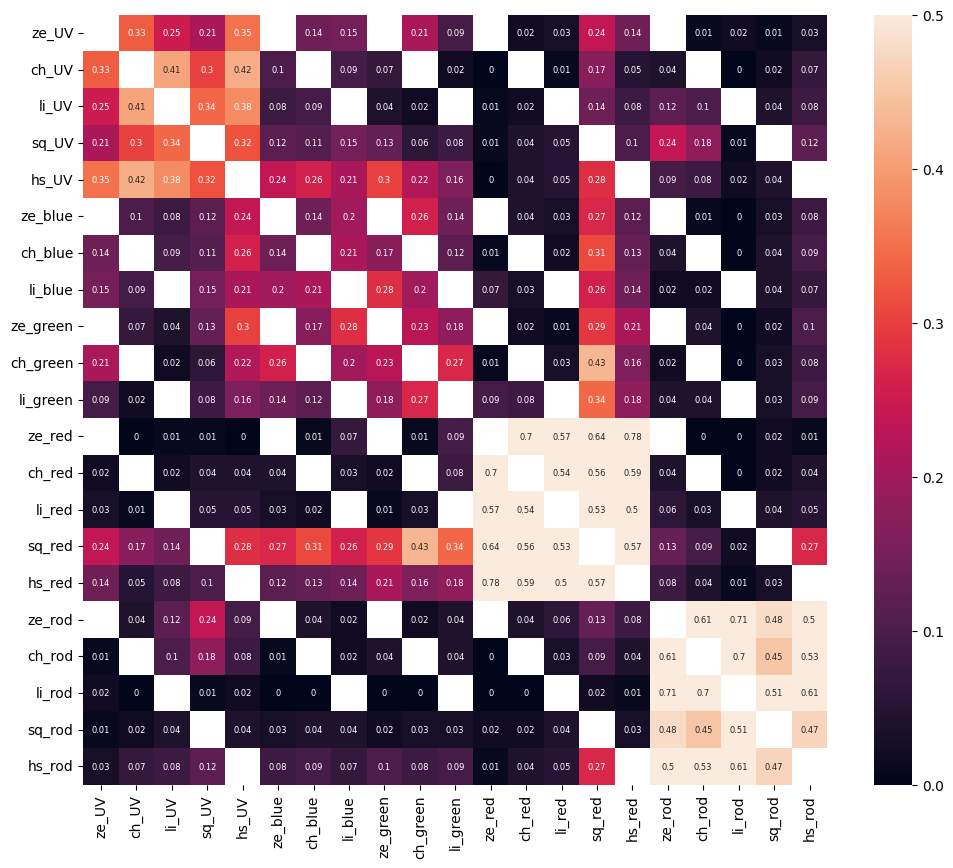

In [8]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
# SaveTables(controlres, 'MappingTables/five_species/liu_single')

In [9]:
# Check genes
gene_pairs = controlres[0][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to hs;UV
Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;UV to li;blue
Calculating gene pairs for the mapping: ch;UV to sq;UV
Calculating gene pairs for the mapping: ch;UV to sq;red
Calculating gene pairs for the mapping: ch;UV to ze;UV
Calculating gene pairs for the mapping: ch;blue to hs;UV
Calculating gene pairs for the mapping: ch;blue to hs;red
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;blue to li;green
Calculating gene pairs for the mapping: ch;blue to sq;UV
Calculating gene pairs for the mapping: ch;blue to sq;red
Calculating gene pairs for the mapping: ch;blue to ze;UV
Calculating gene pairs for the mapping: ch;blue to ze;blue
Calculating gene pairs for the mapping: ch;blue to ze;green
Calculating gene pairs for the mapping: ch;green to hs;UV
Calculating gene pairs for the mapping: ch;green to hs;red
Calculating gene pairs fo

,ch_UV;hs_UV,ch_UV;hs_UV_pval1,ch_UV;hs_UV_pval2,ch_UV;li_UV,ch_UV;li_UV_pval1,ch_UV;li_UV_pval2,ch_UV;li_blue,ch_UV;li_blue_pval1,ch_UV;li_blue_pval2,ch_UV;sq_UV,ch_UV;sq_UV_pval1,ch_UV;sq_UV_pval2,ch_UV;sq_red,ch_UV;sq_red_pval1,ch_UV;sq_red_pval2,ch_UV;ze_UV,ch_UV;ze_UV_pval1,ch_UV;ze_UV_pval2,ch_blue;hs_UV,ch_blue;hs_UV_pval1,ch_blue;hs_UV_pval2,ch_blue;hs_red,ch_blue;hs_red_pval1,ch_blue;hs_red_pval2,ch_blue;li_blue,ch_blue;li_blue_pval1,ch_blue;li_blue_pval2,ch_blue;li_green,ch_blue;li_green_pval1,ch_blue;li_green_pval2,ch_blue;sq_UV,ch_blue;sq_UV_pval1,ch_blue;sq_UV_pval2,ch_blue;sq_red,ch_blue;sq_red_pval1,ch_blue;sq_red_pval2,ch_blue;ze_UV,ch_blue;ze_UV_pval1,ch_blue;ze_UV_pval2,ch_blue;ze_blue,ch_blue;ze_blue_pval1,ch_blue;ze_blue_pval2,ch_blue;ze_green,ch_blue;ze_green_pval1,ch_blue;ze_green_pval2,ch_green;hs_UV,ch_green;hs_UV_pval1,ch_green;hs_UV_pval2,ch_green;hs_red,ch_green;hs_red_pval1,ch_green;hs_red_pval2,ch_green;li_blue,ch_green;li_blue_pval1,ch_green;li_blue_pval2,ch_green;li_green,ch_green;li_green_pval1,ch_green;li_green_pval2,ch_green;sq_red,ch_green;sq_red_pval1,ch_green;sq_red_pval2,ch_green;ze_UV,ch_green;ze_UV_pval1,ch_green;ze_UV_pval2,ch_green;ze_blue,ch_green;ze_blue_pval1,ch_green;ze_blue_pval2,ch_green;ze_green,ch_green;ze_green_pval1,ch_green;ze_green_pval2,ch_red;hs_red,ch_red;hs_red_pval1,ch_red;hs_red_pval2,ch_red;li_red,ch_red;li_red_pval1,ch_red;li_red_pval2,ch_red;sq_red,ch_red;sq_red_pval1,ch_red;sq_red_pval2,ch_red;ze_red,ch_red;ze_red_pval1,ch_red;ze_red_pval2,ch_rod;hs_rod,ch_rod;hs_rod_pval1,ch_rod;hs_rod_pval2,ch_rod;li_UV,ch_rod;li_UV_pval1,ch_rod;li_UV_pval2,ch_rod;li_rod,ch_rod;li_rod_pval1,ch_rod;li_rod_pval2,ch_rod;sq_UV,ch_rod;sq_UV_pval1,ch_rod;sq_UV_pval2,ch_rod;sq_rod,ch_rod;sq_rod_pval1,ch_rod;sq_rod_pval2,ch_rod;ze_rod,ch_rod;ze_rod_pval1,ch_rod;ze_rod_pval2,hs_UV;li_UV,hs_UV;li_UV_pval1,hs_UV;li_UV_pval2,hs_UV;li_blue,hs_UV;li_blue_pval1,hs_UV;li_blue_pval2,hs_UV;li_green,hs_UV;li_green_pval1,hs_UV;li_green_pval2,hs_UV;sq_UV,hs_UV;sq_UV_pval1,hs_UV;sq_UV_pval2,hs_UV;sq_red,hs_UV;sq_red_pval1,hs_UV;sq_red_pval2,hs_UV;ze_UV,hs_UV;ze_UV_pval1,hs_UV;ze_UV_pval2,hs_UV;ze_blue,hs_UV;ze_blue_pval1,hs_UV;ze_blue_pval2,hs_UV;ze_green,hs_UV;ze_green_pval1,hs_UV;ze_green_pval2,hs_red;li_blue,hs_red;li_blue_pval1,hs_red;li_blue_pval2,hs_red;li_green,hs_red;li_green_pval1,hs_red;li_green_pval2,hs_red;li_red,hs_red;li_red_pval1,hs_red;li_red_pval2,hs_red;sq_red,hs_red;sq_red_pval1,hs_red;sq_red_pval2,hs_red;ze_UV,hs_red;ze_UV_pval1,hs_red;ze_UV_pval2,hs_red;ze_blue,hs_red;ze_blue_pval1,hs_red;ze_blue_pval2,hs_red;ze_green,hs_red;ze_green_pval1,hs_red;ze_green_pval2,hs_red;ze_red,hs_red;ze_red_pval1,hs_red;ze_red_pval2,hs_rod;li_UV,hs_rod;li_UV_pval1,hs_rod;li_UV_pval2,hs_rod;li_rod,hs_rod;li_rod_pval1,hs_rod;li_rod_pval2,hs_rod;sq_UV,hs_rod;sq_UV_pval1,hs_rod;sq_UV_pval2,hs_rod;sq_red,hs_rod;sq_red_pval1,hs_rod;sq_red_pval2,hs_rod;sq_rod,hs_rod;sq_rod_pval1,hs_rod;sq_rod_pval2,hs_rod;ze_rod,hs_rod;ze_rod_pval1,hs_rod;ze_rod_pval2,li_UV;sq_UV,li_UV;sq_UV_pval1,li_UV;sq_UV_pval2,li_UV;sq_red,li_UV;sq_red_pval1,li_UV;sq_red_pval2,li_UV;ze_UV,li_UV;ze_UV_pval1,li_UV;ze_UV_pval2,li_UV;ze_rod,li_UV;ze_rod_pval1,li_UV;ze_rod_pval2,li_blue;sq_UV,li_blue;sq_UV_pval1,li_blue;sq_UV_pval2,li_blue;sq_red,li_blue;sq_red_pval1,li_blue;sq_red_pval2,li_blue;ze_UV,li_blue;ze_UV_pval1,li_blue;ze_UV_pval2,li_blue;ze_blue,li_blue;ze_blue_pval1,li_blue;ze_blue_pval2,li_blue;ze_green,li_blue;ze_green_pval1,li_blue;ze_green_pval2,li_green;sq_red,li_green;sq_red_pval1,li_green;sq_red_pval2,li_green;ze_blue,li_green;ze_blue_pval1,li_green;ze_blue_pval2,li_green;ze_green,li_green;ze_green_pval1,li_green;ze_green_pval2,li_green;ze_red,li_green;ze_red_pval1,li_green;ze_red_pval2,li_red;sq_red,li_red;sq_red_pval1,li_red;sq_red_pval2,li_red;ze_red,li_red;ze_red_pval1,li_red;ze_red_pval2,li_rod;sq_rod,li_rod;sq_rod_pval1,li_rod;sq_rod_pval2,li_rod;ze_rod,li_rod;ze_rod_pval1,li_rod;ze_rod_pval2,sq_UV;ze_UV,sq_UV;ze_

## TF Liu et al. with DCs

In [17]:
path = '../../Species_Objects/Cone_Objects/only_tfs_corbo/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
expfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_corbo/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Lizard_double.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Squirrel_double.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Human_double.h5ad'}

In [18]:
def wrapper(seed, downsample):
    return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAM


Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0




/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7212858665376588Iteration: 1, Convergence: 0.6974134840543295

Iteration: 1, Convergence: 0.7027328139165819
Iteration: 1, Convergence: 0.711466997354141Iteration: 1, Convergence: 0.713557399013485

Iteration: 2, Convergence: 0.03783760259832234
Iteration: 2, Convergence: 0.042792662938892785
Iteration: 2, Convergence: 0.0373499113985111
Iteration: 2, Convergence: 0.04082240450999847
Iteration: 2, Convergence: 0.04388078242667567
Iteration: 3, Convergence: 0.01825563438889326
Iteration: 3, Convergence: 0.018379692342038987
Iteration: 3, Convergence: 0.016999650803115215
Elapsed time: 1.7200052738189697 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0Iteration: 3, Convergence: 0.020263898327710514
Iteration: 3, Convergence: 0.01953001283212879

Iteration: 4, Convergence: 0.010091325267636375
Elapsed time: 1.9772188663482666 seconds
RUNNING SAM
Iteration: 0, Convergence: 1

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0
Elapsed time: 3.560260534286499 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.03442114847958493
Iteration: 1, Convergence: 0.6123552003936713
Iteration: 1, Convergence: 0.6779658442986415
Elapsed time: 1.3641142845153809 seconds


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


RUNNING SAMIteration: 1, Convergence: 0.6506173311712574

Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.04309925132797199
Iteration: 2, Convergence: 0.051344756465384764
Elapsed time: 1.3734238147735596 seconds


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/samalg/__init__.py:225: RuntimeWarning: divide by zero encountered in divide
  D = D.multiply(1 / s[:, None] * sum_norm).tocsr()


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.03439626530386592
Iteration: 1, Convergence: 0.6529635176199265
Iteration: 3, Convergence: 0.013581371900762664
Iteration: 3, Convergence: 0.015216721641872691
Iteration: 1, Convergence: 0.6690439980880184
Elapsed time: 1.5324347019195557 seconds
Elapsed time: 1.3158843517303467 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.03851182492453589
Iteration: 2, Convergence: 0.053212223229974445
Elapsed time: 1.7233531475067139 seconds
Not updating the manifold...
Iteration: 1, Convergence: 0.6587868683687801
Not updating the manifold...
Iteration: 3, Convergence: 0.020589853111790155
Iteration: 2, Convergence: 0.05035356471517441
Elapsed time: 1.5849244594573975 seconds
Iteration: 4, Convergence: 0.01413196663067029
Iteration: 3, Convergence: 0.013035968283976709
Not updating the manifold...
Not updating the manifold...Not updating the manifold...

Elapsed time: 2.0886731147766113 second

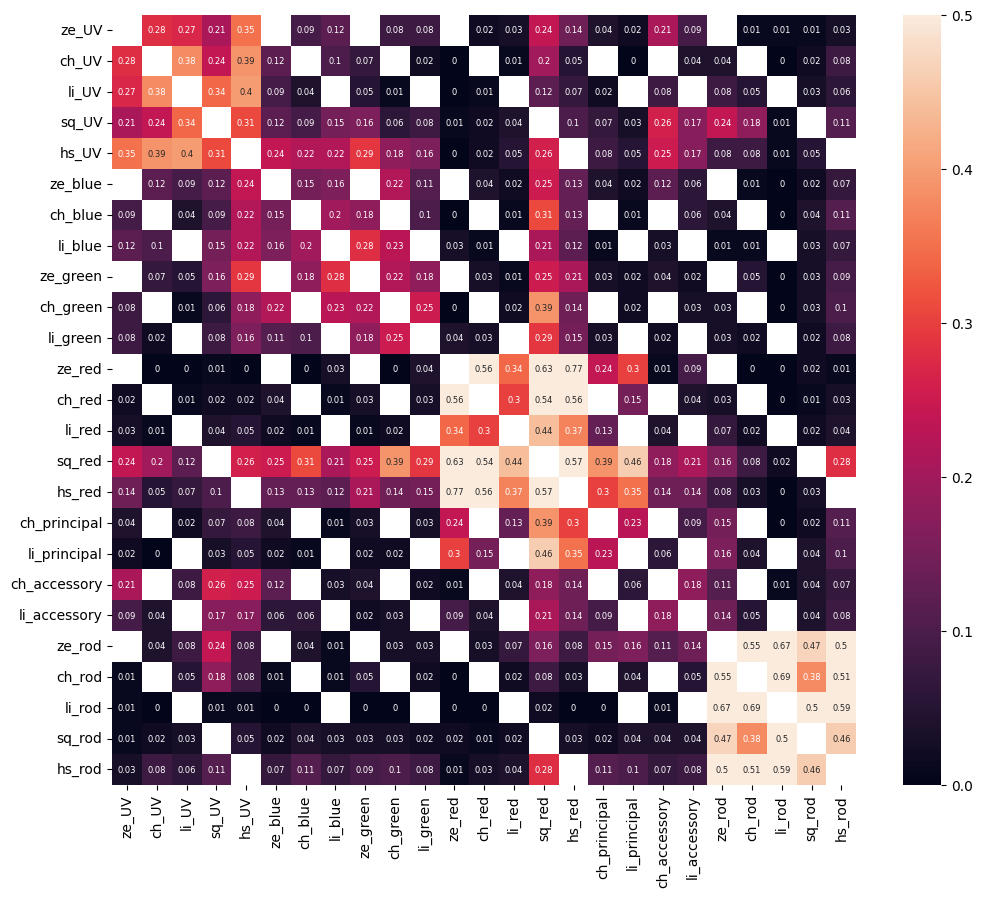

In [19]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species/liu_double')

In [ ]:
raise KeyboardInterrupt

# Five species, no rods

In [20]:
path = '../../Species_Objects/Cone_Objects/updated/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
zechlisqhs_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
zechlisqhs_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))

zechlisqhs_single

{'ze': '../../Species_Objects/Cone_Objects/updated/ZebrafishAdult_single.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/updated/Chicken_single.h5ad',
 'li': '../../Species_Objects/Cone_Objects/updated/Lizard_single.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/updated/Squirrel_single.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/updated/Human_single.h5ad'}

## Whole transcriptome without DCs

In [21]:
from multiprocessing import Pool

def wrapper(seed, downsample):
    return SAMapTrial(zechlisqhs_single, gnnm, plot = False, types_remove = ['rod'], seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readth

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0RUNNING SAM

Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.931062749866261
Iteration: 1, Convergence: 0.9296498594993419
Iteration: 1, Convergence: 0.9286985600369064
Iteration: 1, Convergence: 0.9293294419636707
Iteration: 1, Convergence: 0.9281016144085883
Iteration: 2, Convergence: 0.02002959835598984
Iteration: 2, Convergence: 0.023343172210396744
Iteration: 2, Convergence: 0.019943392278356398
Iteration: 2, Convergence: 0.019075793019242036
Elapsed time: 3.6416964530944824 seconds
Iteration: 2, Convergence: 0.023710763520907025
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 4.199888467788696 seconds
Elapsed time: 3.8928606510162354 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8624967551873234
Elapsed time: 5.2973949909210205 seconds
RUNNING SAM
Iteration:

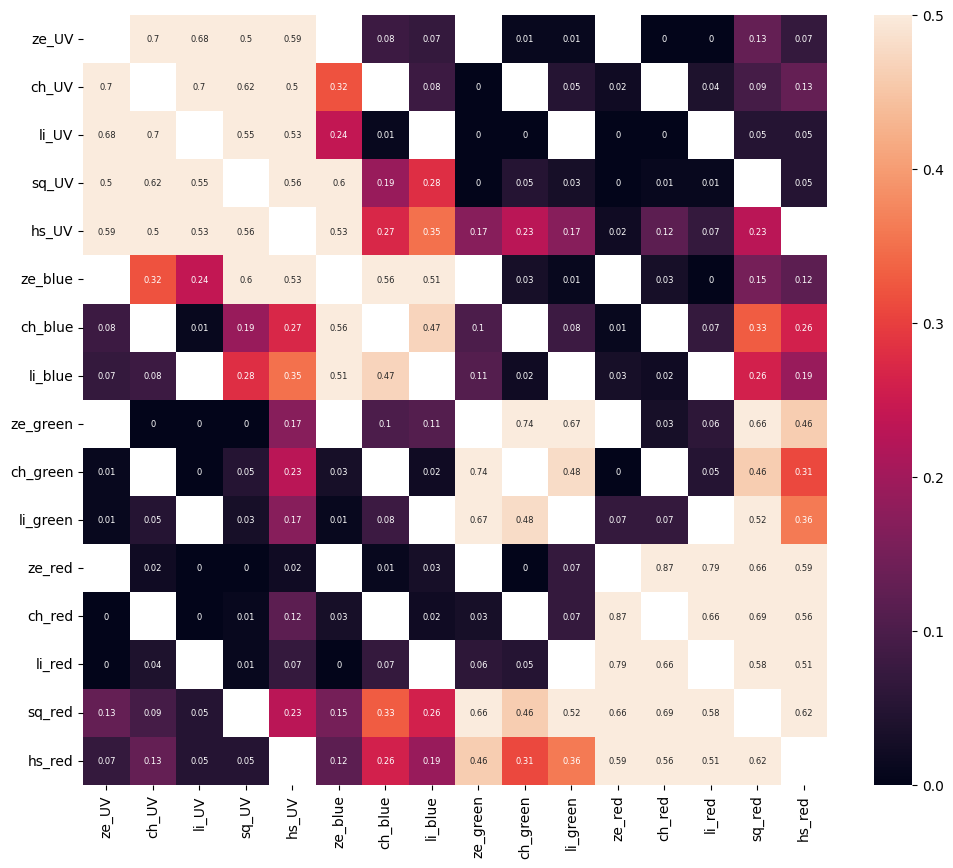

In [22]:
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species_no_rods/zechlisqhs_single')

## Whole transcriptome with DCs

In [23]:
def wrapper(seed, downsample):
    return SAMapTrial(zechlisqhs_double, gnnm, plot = False, seed = seed, types_remove = ['rod'], downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        zechlisqhs_double_res = p.starmap(wrapper, zip(range(nIter), repeat(100)))
        

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readth

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9296498594993419
Iteration: 1, Convergence: 0.9293294419636707
Iteration: 1, Convergence: 0.9281016144085883
Iteration: 1, Convergence: 0.931062749866261
Iteration: 2, Convergence: 0.019943392278356398
Iteration: 1, Convergence: 0.9286985600369064
Iteration: 2, Convergence: 0.019075793019242036
Elapsed time: 3.5586588382720947 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.023710763520907025
Iteration: 2, Convergence: 0.02002959835598984
Iteration: 2, Convergence: 0.023343172210396744
Elapsed time: 4.425874471664429 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 6.121089458465576 seconds
Elapsed time: 5.46856427192688 seconds
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Elapsed time: 7.891543865203857 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8756211404637689
Iteration: 1, Convergence: 0

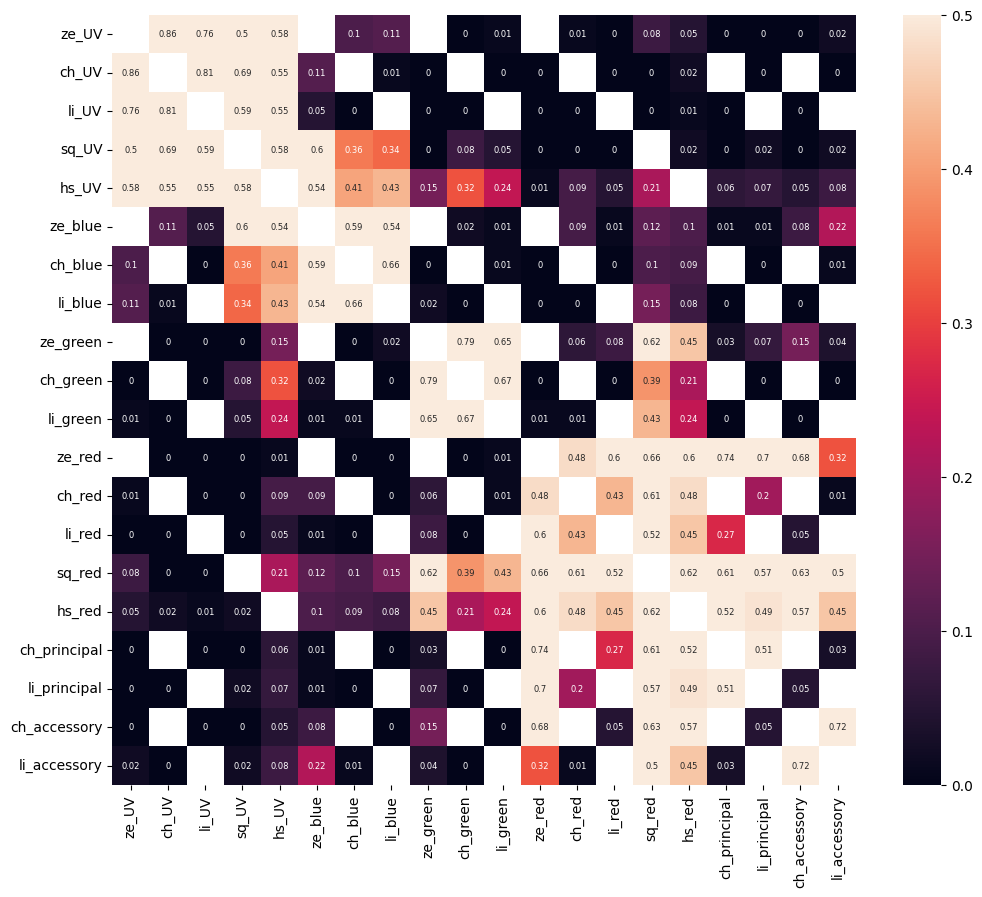

In [24]:
MeanTable(zechlisqhs_double_res, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species_no_rods/zechlisqhs_double')

## TF AnimalTFDB without DCs

In [25]:
path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
controlfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/ZebrafishAdult_single.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Chicken_single.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Lizard_single.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Squirrel_single.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Human_single.h5ad'}

In [26]:
def wrapper(seed, downsample):
    return SAMapTrial(controlfiles, gnnm, plot = False, seed = seed, types_remove = ['rod'], downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip([0,1,3,4,5], repeat(100))) # seed 2 leads to SVD convergence error due to numerical instability, so skip it

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readth

RUNNING SAM

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8786829866878295
Iteration: 1, Convergence: 0.8769396831929721
Iteration: 1, Convergence: 0.8767027337135855
Iteration: 2, Convergence: 0.01998333681555574
Iteration: 1, Convergence: 0.8784076763029208
Iteration: 1, Convergence: 0.8765189577544793
Iteration: 2, Convergence: 0.018877483298772747
Iteration: 2, Convergence: 0.018439008655670067
Elapsed time: 1.9604740142822266 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.01898517584743855
Elapsed time: 2.5749545097351074 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.019352348396439994
Iteration: 1, Convergence: 0.7352782039217844
Elapsed time: 3.0582478046417236 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7455026337098464
Elapsed time: 3.4421324729919434 seconds
RUNNING SAM
Iterat

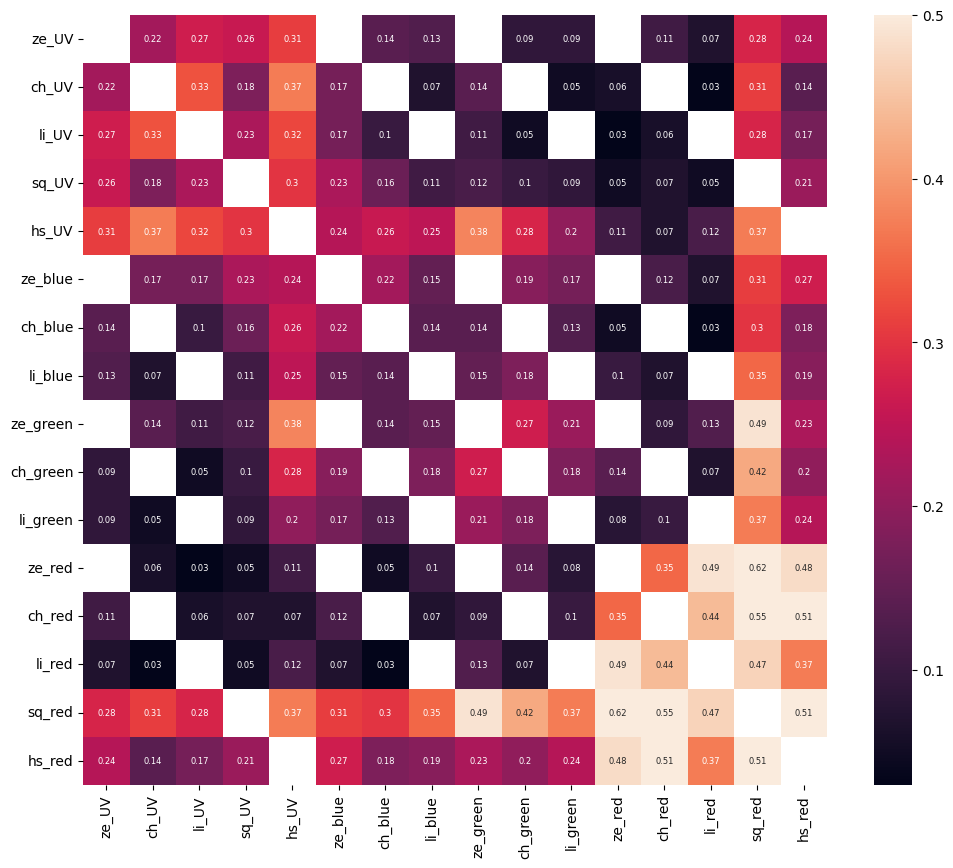

In [27]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species_no_rods/animaldb_single')

## TF AnimalTFDB with DCs

In [28]:
path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
expfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Lizard_double.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Squirrel_double.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Human_double.h5ad'}

In [29]:
def wrapper(seed, downsample):
    return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, types_remove = ['rod'], downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip([0,1,3,4,5], repeat(100))) # seed 2 leads to SVD convergence error due to numerical instability, so skip it

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readth

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8786829866878295
Iteration: 1, Convergence: 0.8784076763029208
Iteration: 1, Convergence: 0.8767027337135855
Iteration: 1, Convergence: 0.8765189577544793
Iteration: 1, Convergence: 0.8769396831929721
Iteration: 2, Convergence: 0.019352348396439994
Iteration: 2, Convergence: 0.018877483298772747
Iteration: 2, Convergence: 0.018439008655670067
Iteration: 2, Convergence: 0.01998333681555574
Iteration: 2, Convergence: 0.01898517584743855
Elapsed time: 3.0241177082061768 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.2188961505889893 seconds
Elapsed time: 3.0168581008911133 secondsRUNNING SAM

Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 2.942413091659546 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.2062110900878906 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.73601113277911
Iteration: 1, Convergence:

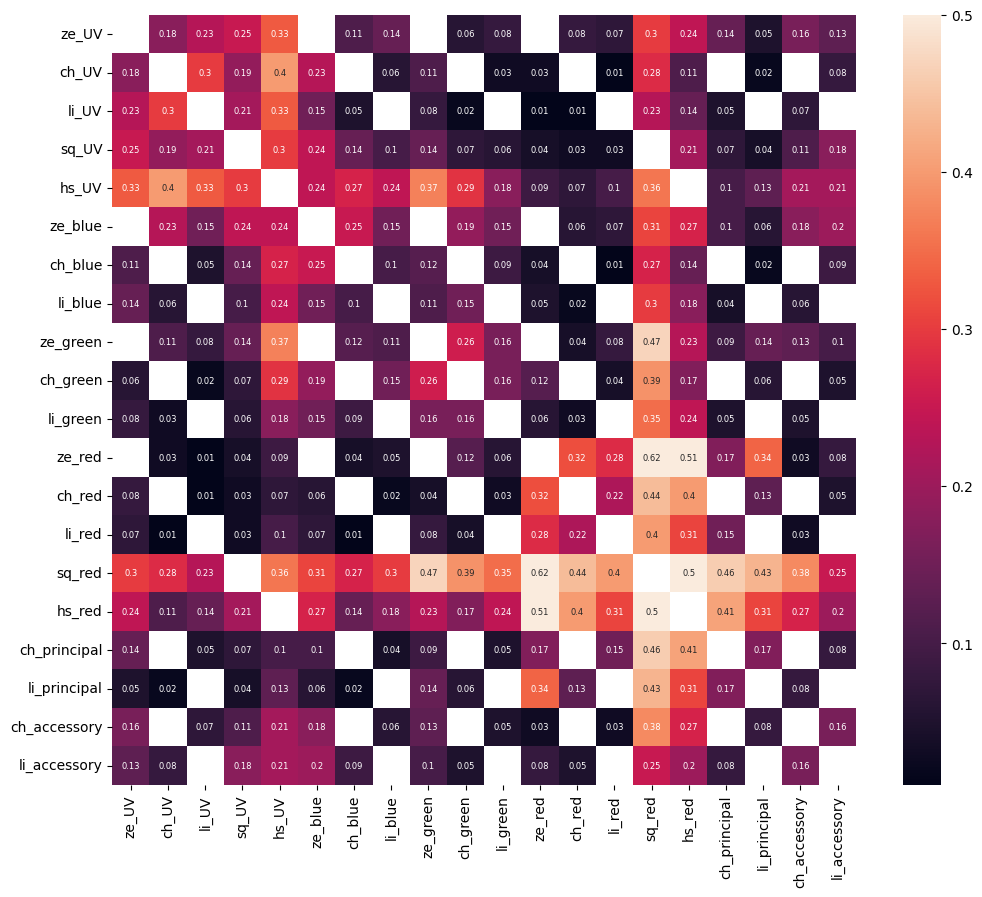

In [30]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species_no_rods/animaldb_double')

## TF Liu et al. without DCs

In [31]:
path = '../../Species_Objects/Cone_Objects/only_tfs_corbo/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
controlfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_corbo/ZebrafishAdult_single.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Chicken_single.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Lizard_single.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Squirrel_single.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Human_single.h5ad'}

In [32]:
def wrapper(seed, downsample):
    return SAMapTrial(controlfiles, gnnm, plot = False, seed = seed, types_remove = ['rod'], downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readth

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.721557627819105
Iteration: 1, Convergence: 0.7375363405720535
Iteration: 1, Convergence: 0.7262238618538213
Iteration: 1, Convergence: 0.7181875848249668
Iteration: 1, Convergence: 0.7284583619377838
Iteration: 2, Convergence: 0.02805090856628766
Iteration: 2, Convergence: 0.02272786799452216
Iteration: 2, Convergence: 0.03824070913425892
Iteration: 2, Convergence: 0.028299465035164097
Iteration: 2, Convergence: 0.031505786857543044
Elapsed time: 1.5865588188171387 seconds
Iteration: 3, Convergence: 0.014498841830655543
Iteration: 3, Convergence: 0.010688676862581238
RUNNING SAM
Iteration: 0, Convergence: 1.0Elapsed time: 1.5633177757263184 seconds

RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 1.580913782119751 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 1.828254222869873 secondsIteration: 1, Conve

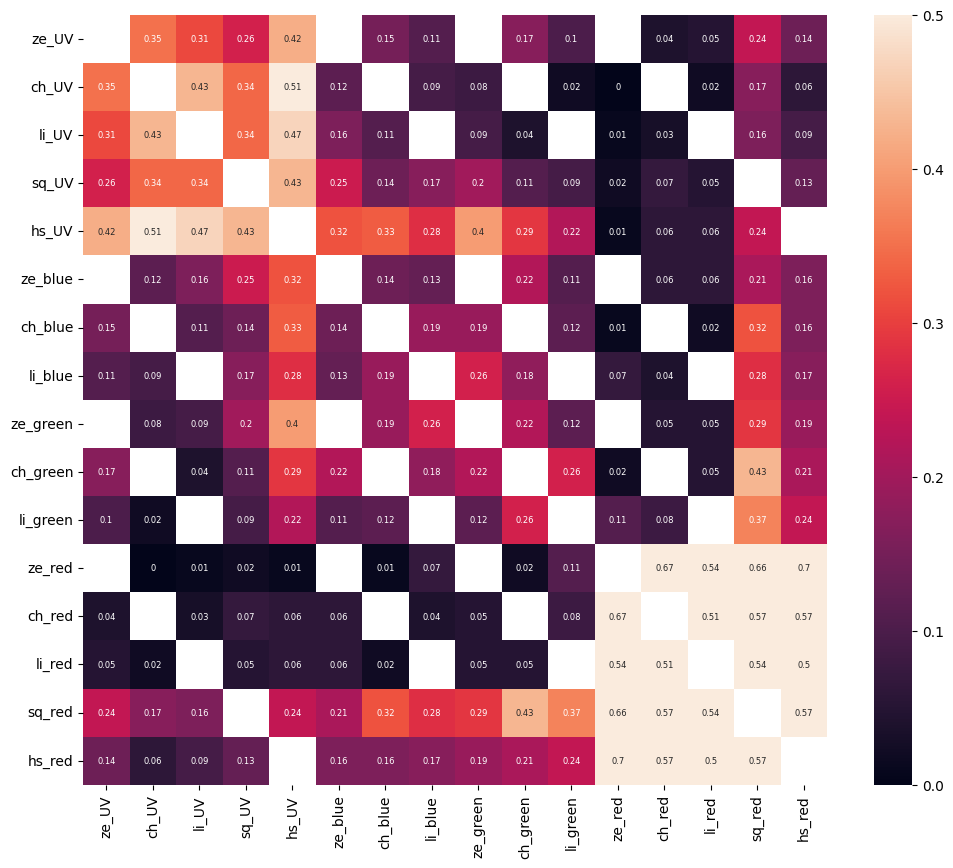

In [33]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species_no_rods/liu_single')

## TF Liu et al. with DCs

In [34]:
path = '../../Species_Objects/Cone_Objects/only_tfs_corbo/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard', 'Squirrel', 'Human']
identlist = ['ze', 'ch', 'li', 'sq', 'hs']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
expfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_corbo/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Lizard_double.h5ad',
 'sq': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Squirrel_double.h5ad',
 'hs': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Human_double.h5ad'}

In [35]:
def wrapper(seed, downsample):
    return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, types_remove = ['rod'], downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nProcesses) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merge = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:158: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readth

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7375363405720535
Iteration: 1, Convergence: 0.7262238618538213
Iteration: 1, Convergence: 0.721557627819105
Iteration: 1, Convergence: 0.7284583619377838
Iteration: 1, Convergence: 0.7181875848249668
Iteration: 2, Convergence: 0.02272786799452216
Iteration: 2, Convergence: 0.02805090856628766
Iteration: 2, Convergence: 0.028299465035164097
Iteration: 2, Convergence: 0.03824070913425892
Elapsed time: 1.3032035827636719 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.031505786857543044
Elapsed time: 1.4525237083435059 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 3, Convergence: 0.010688676862581238
Iteration: 1, Convergence: 0.5025411279773576
Iteration: 3, Convergence: 0.014498841830655543
Elapsed time: 1.8444688320159912 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergen

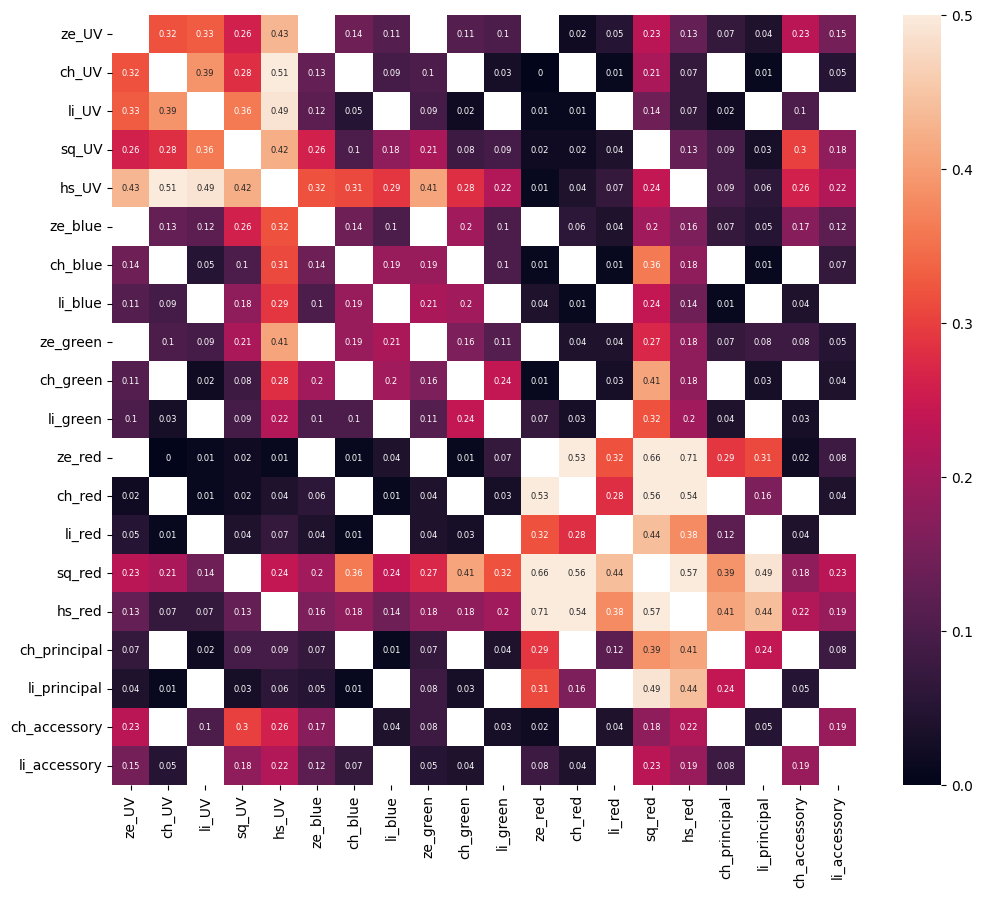

In [36]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/five_species_no_rods/liu_double')